In [447]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [858]:
data = pd.read_csv('car_price_prediction.csv')

In [493]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [576]:
np.unique(data['Gear box type'])

array(['Automatic', 'Manual', 'Tiptronic', 'Variator'], dtype=object)

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [274]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [859]:
data = data.drop('Levy',axis = 1)

In [860]:
data['Mileage'] = data["Mileage"].apply(lambda x: x.split(' ')[0]).astype(int)

In [861]:
data['Doors'] = data['Doors'].map({'04-May':4, '02-Mar':2, '>5':5})

In [862]:
data

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,45778856,15681,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,45804997,26108,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4,Left wheel,Grey,4
19235,45793526,5331,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,4,Left wheel,Black,4


In [863]:
data['Engine volume'] = data["Engine volume"].apply(lambda x: x.split(' ')[0]).astype(float)

In [501]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  int32  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  int64  
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

<AxesSubplot:xlabel='Price', ylabel='Count'>

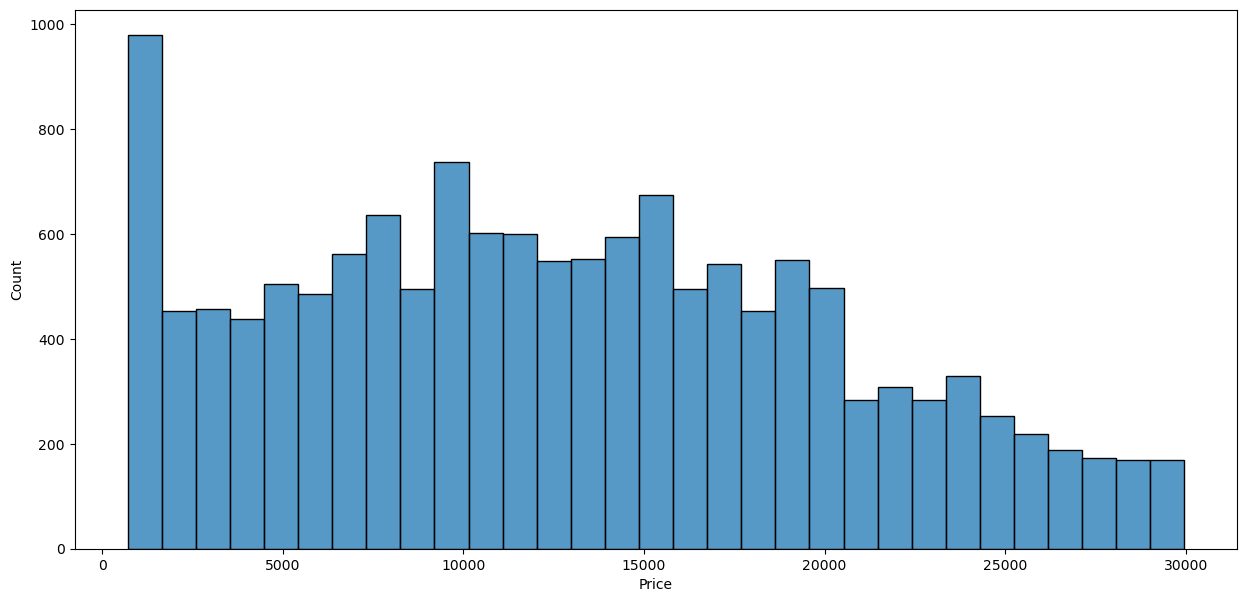

In [280]:
plt.subplots(figsize=(15,7))
sns.histplot(data[(data['Price']<30000)&(data['Price']>700)]['Price'])

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

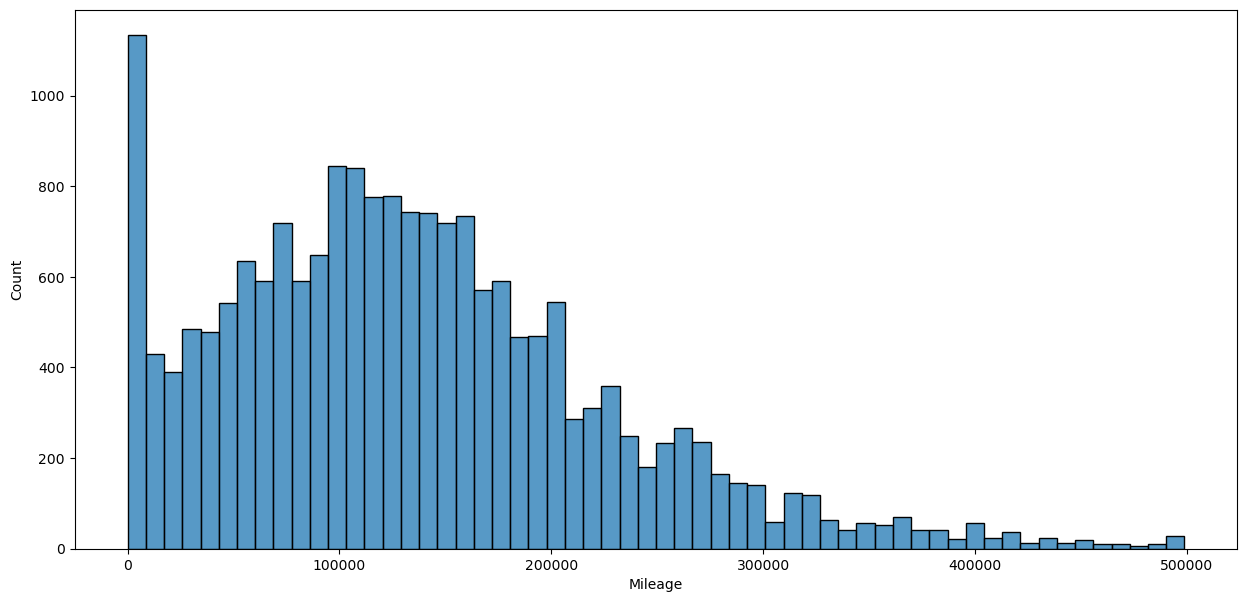

In [37]:
plt.subplots(figsize=(15,7))
sns.histplot(data[data['Mileage']<500000]['Mileage'])

(0.0, 7.5)

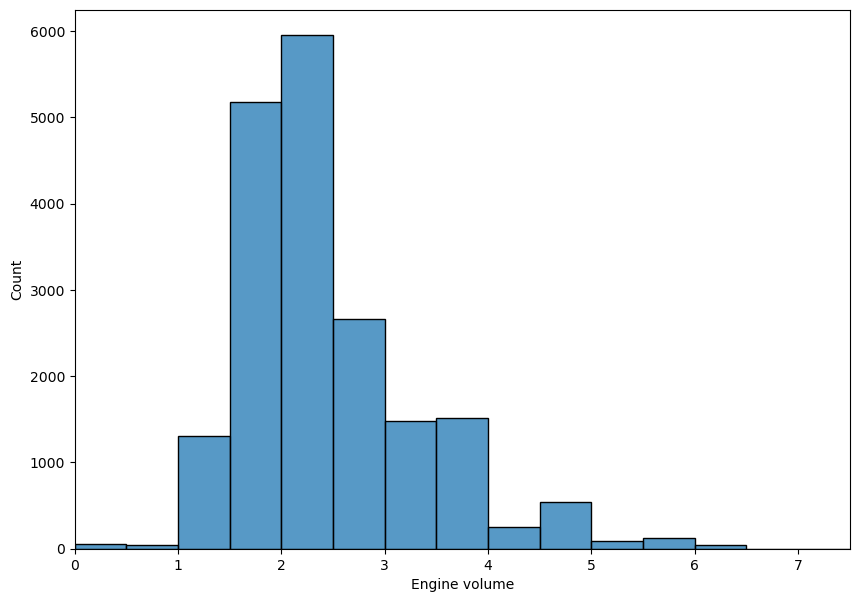

In [45]:
fig,ag = plt.subplots(figsize=(10,7))
sns.histplot(data['Engine volume'],bins = 40)
plt.xlim([0,7.5])

<AxesSubplot:xlabel='Airbags', ylabel='Count'>

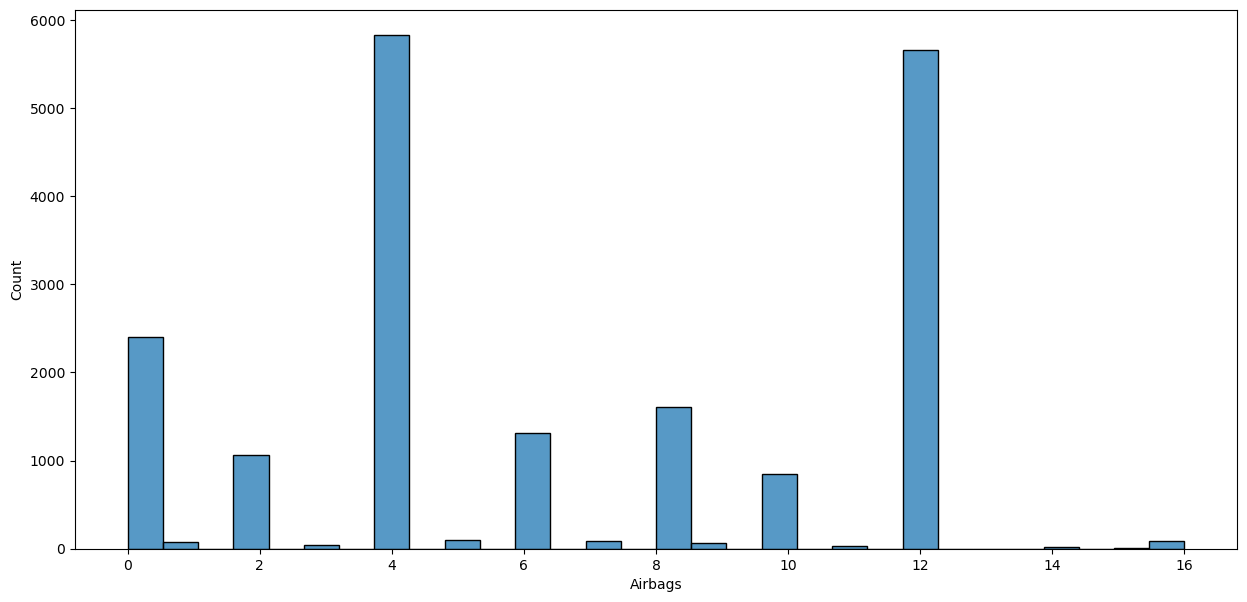

In [46]:
fig,ax = plt.subplots(figsize=(15,7))
sns.histplot(data['Airbags'],bins=30)

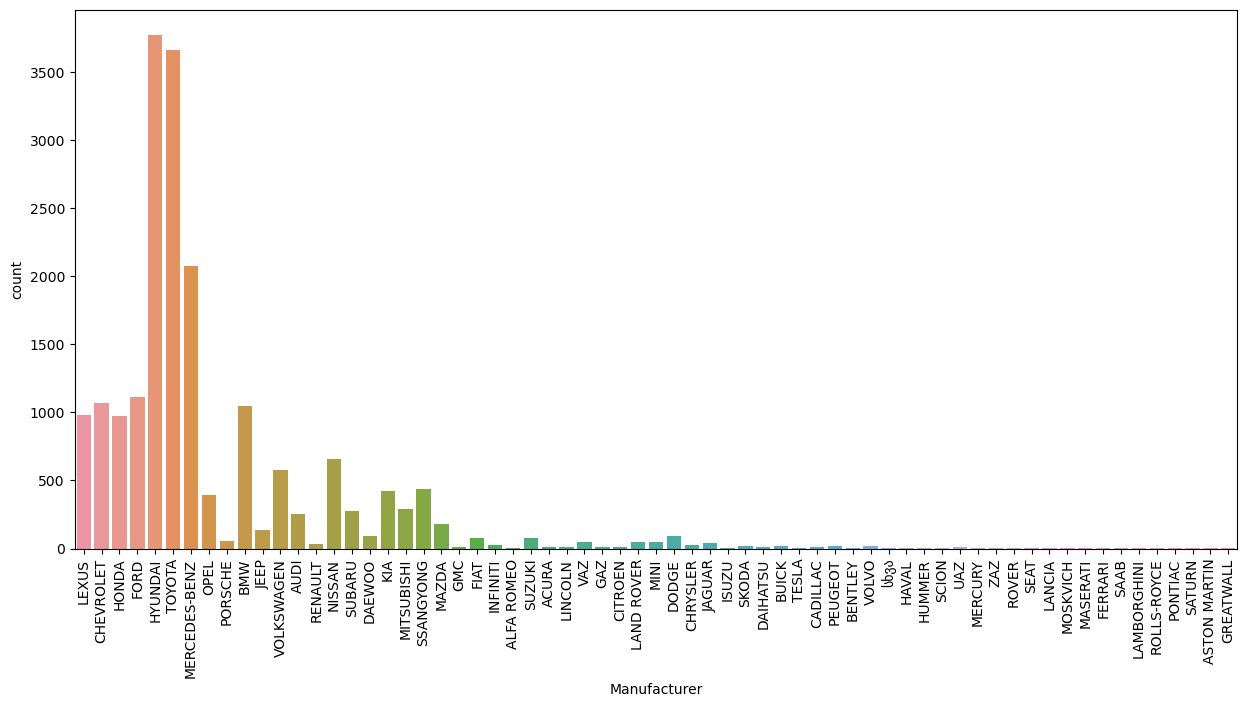

In [1123]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(data = data,x='Manufacturer')
plt.xticks(rotation=90);

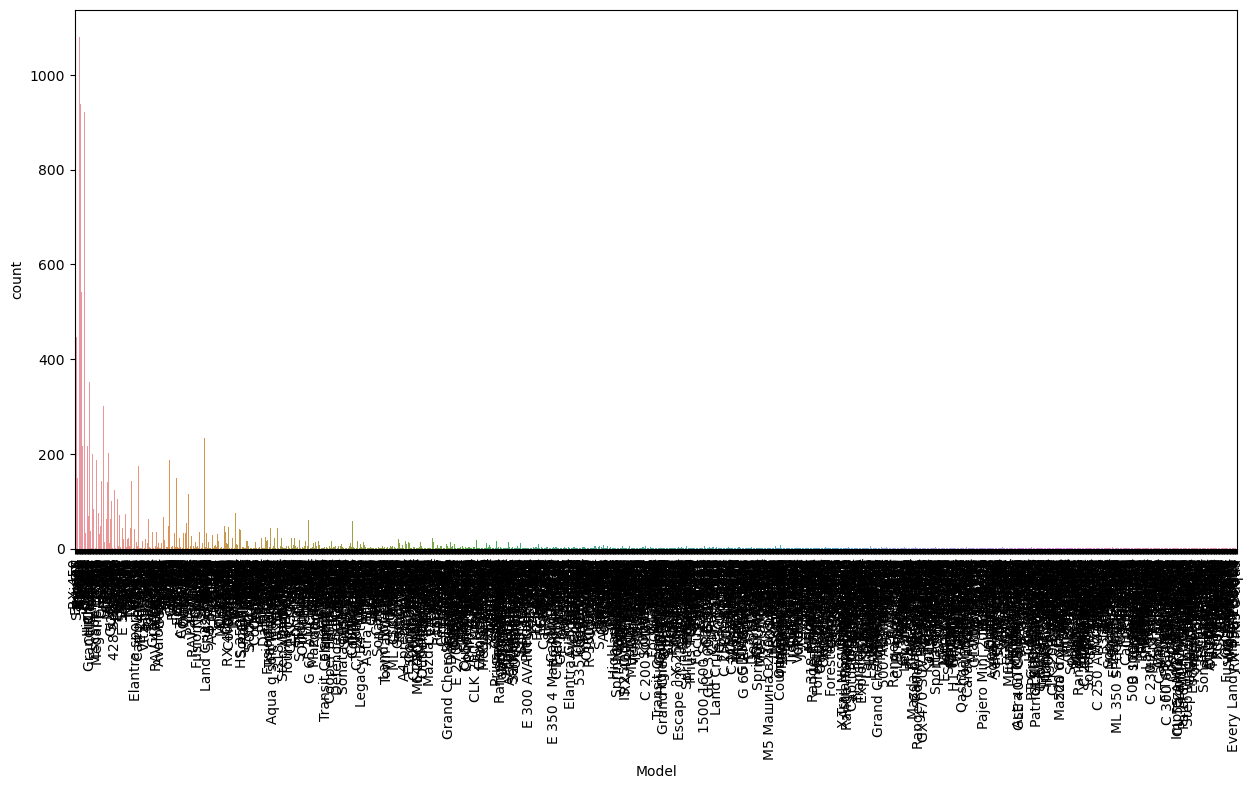

In [1124]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(data = data,x='Model')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Category', ylabel='count'>

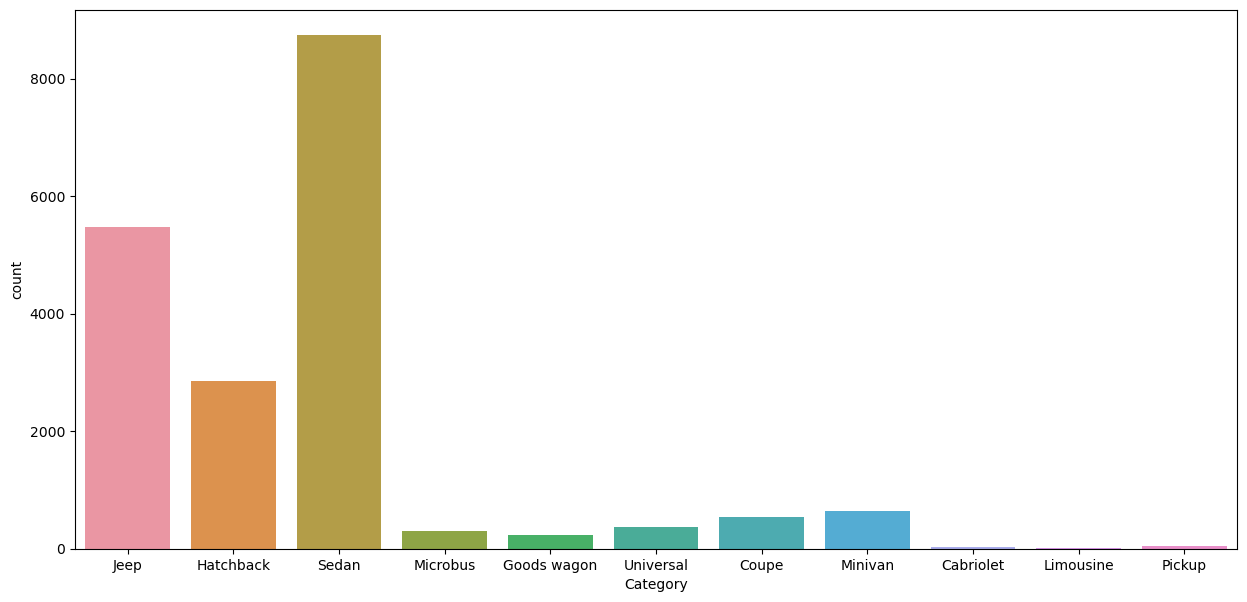

In [48]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(data = data,x='Category')

<AxesSubplot:xlabel='Fuel type', ylabel='count'>

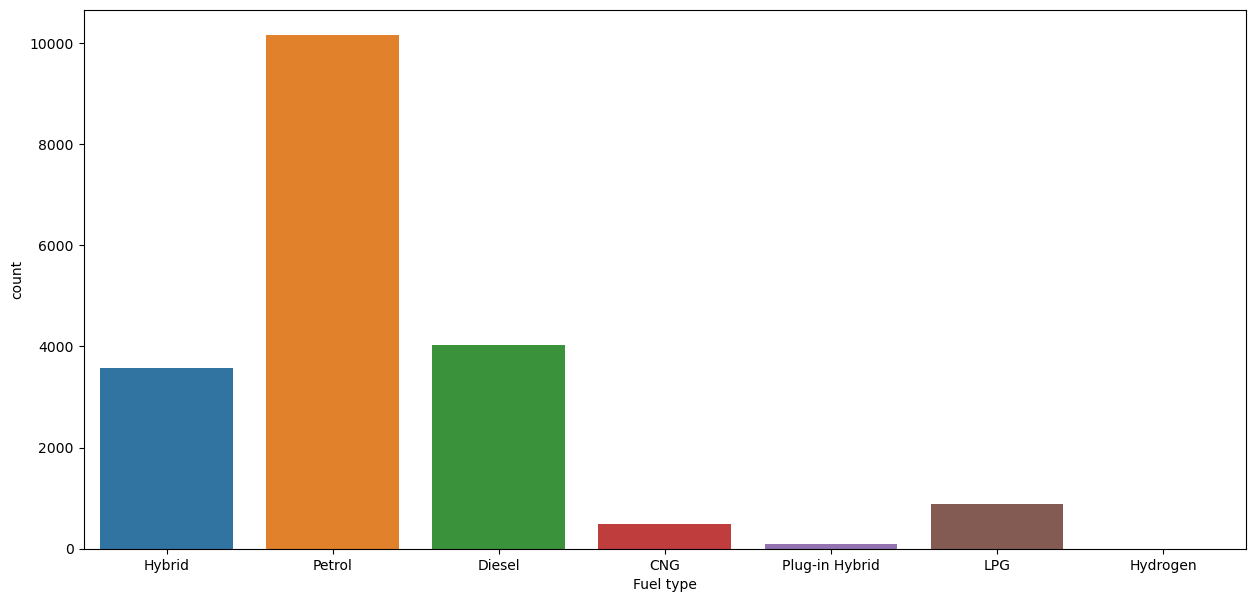

In [50]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=data,x='Fuel type')

<AxesSubplot:xlabel='Gear box type', ylabel='count'>

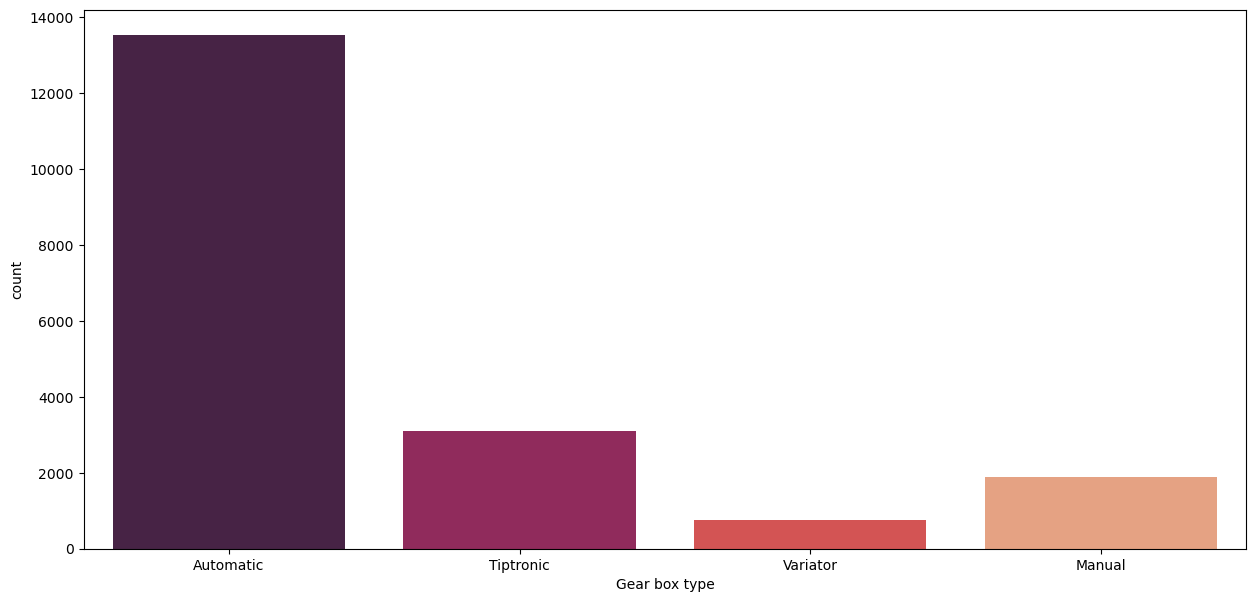

In [51]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(data = data,x='Gear box type',palette='rocket')

<AxesSubplot:xlabel='Drive wheels', ylabel='count'>

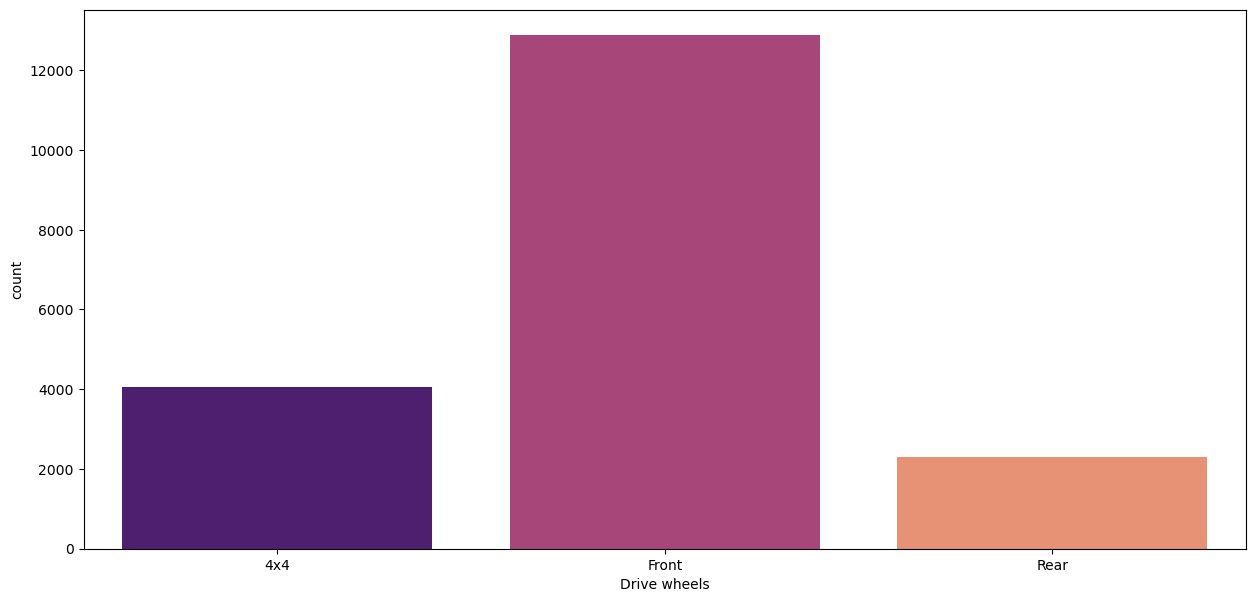

In [52]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(data = data,x='Drive wheels',palette='magma')

<AxesSubplot:xlabel='Doors', ylabel='count'>

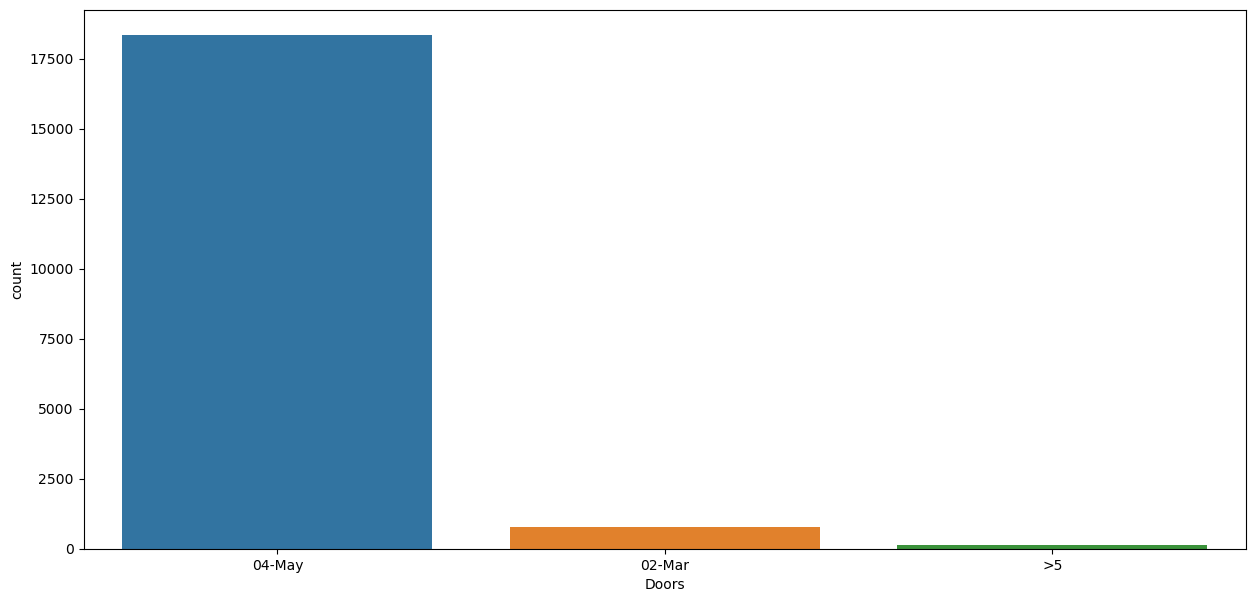

In [53]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=data,x='Doors')

<AxesSubplot:xlabel='Wheel', ylabel='count'>

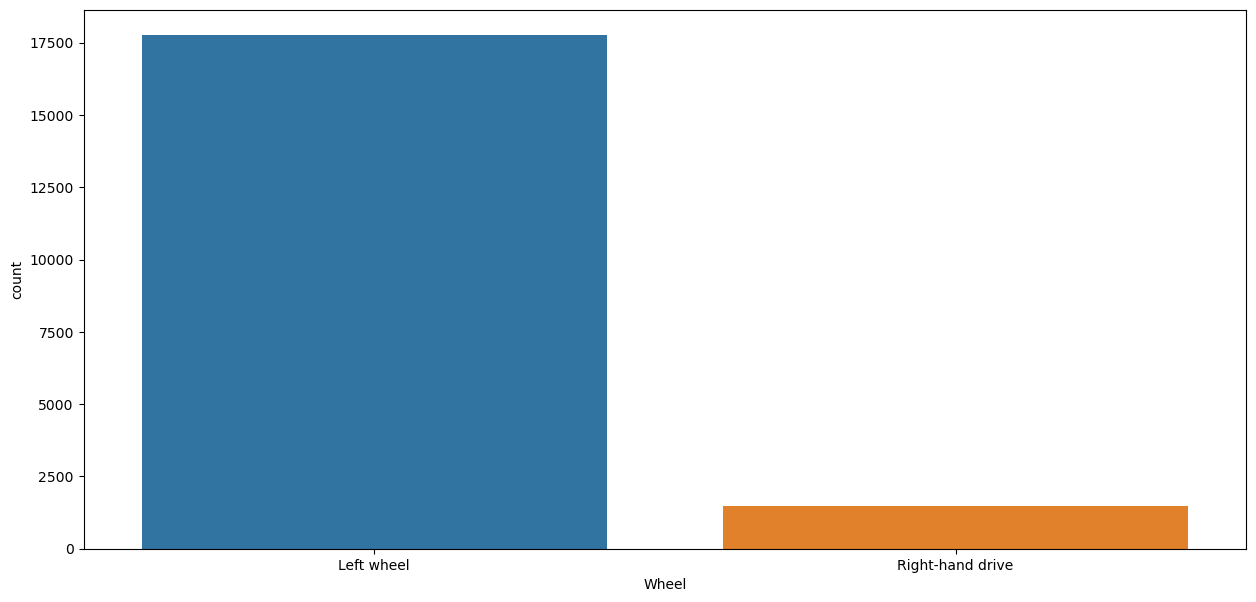

In [54]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=data,x='Wheel')

<AxesSubplot:xlabel='Color', ylabel='count'>

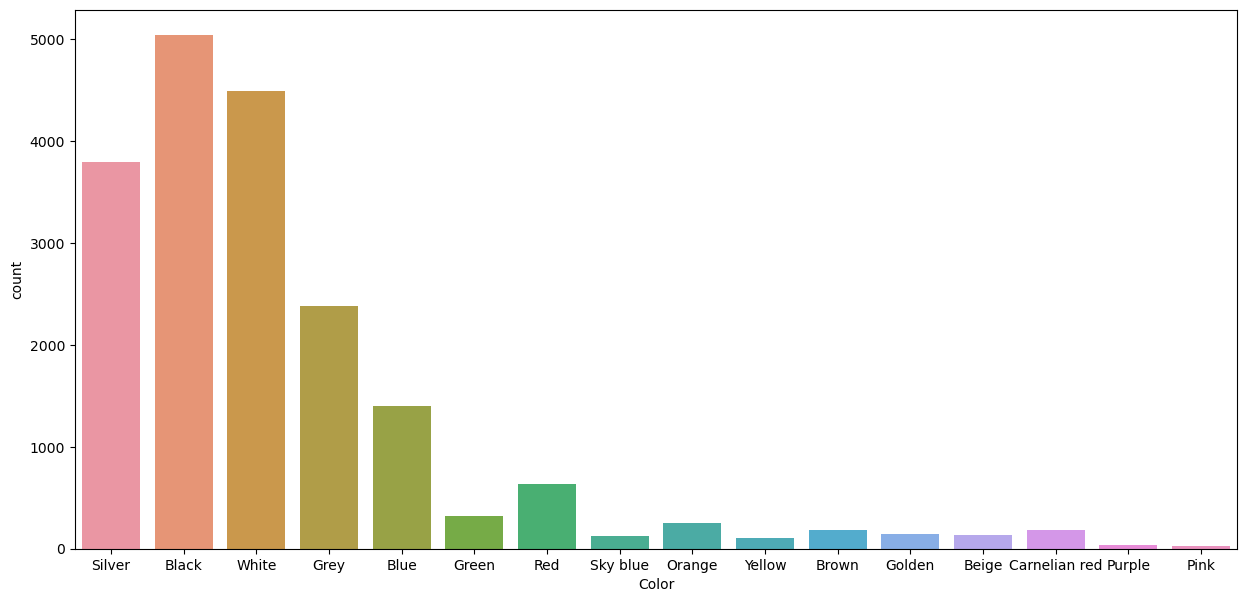

In [56]:
fig,ax=plt.subplots(figsize=(15,7))
sns.countplot(data=data,x='Color')

In [61]:
data_filt = data[(data['Price']<50000)&(data['Price']>700)]

<AxesSubplot:xlabel='Category', ylabel='Price'>

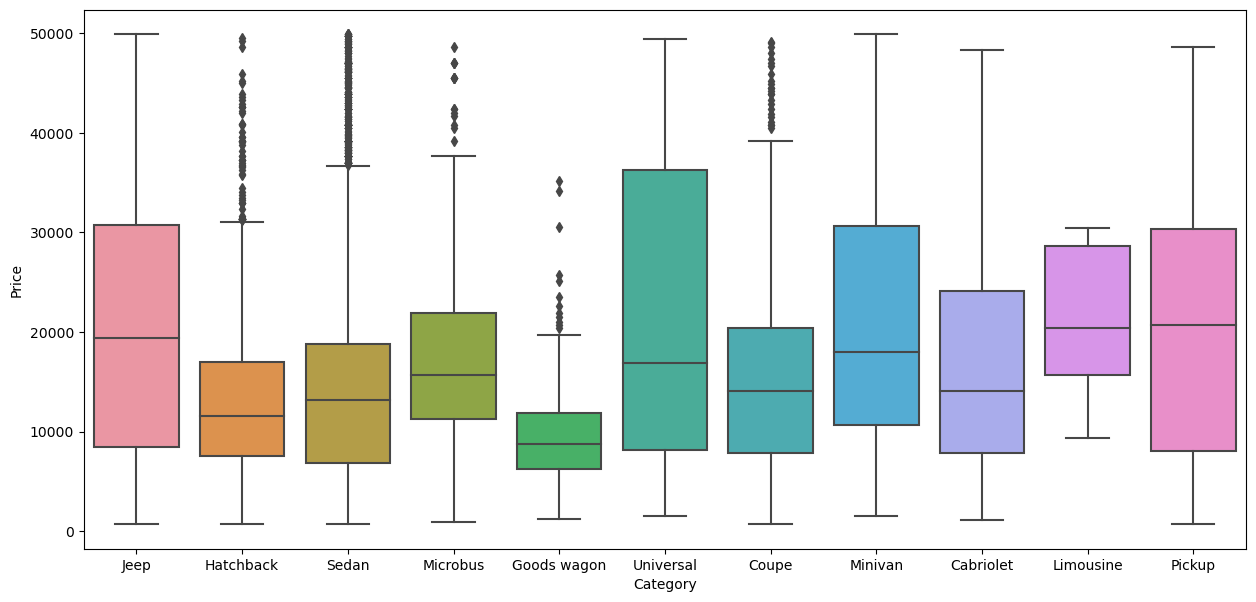

In [62]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data= data_filt ,x='Category', y='Price')

<AxesSubplot:xlabel='Category', ylabel='Mileage'>

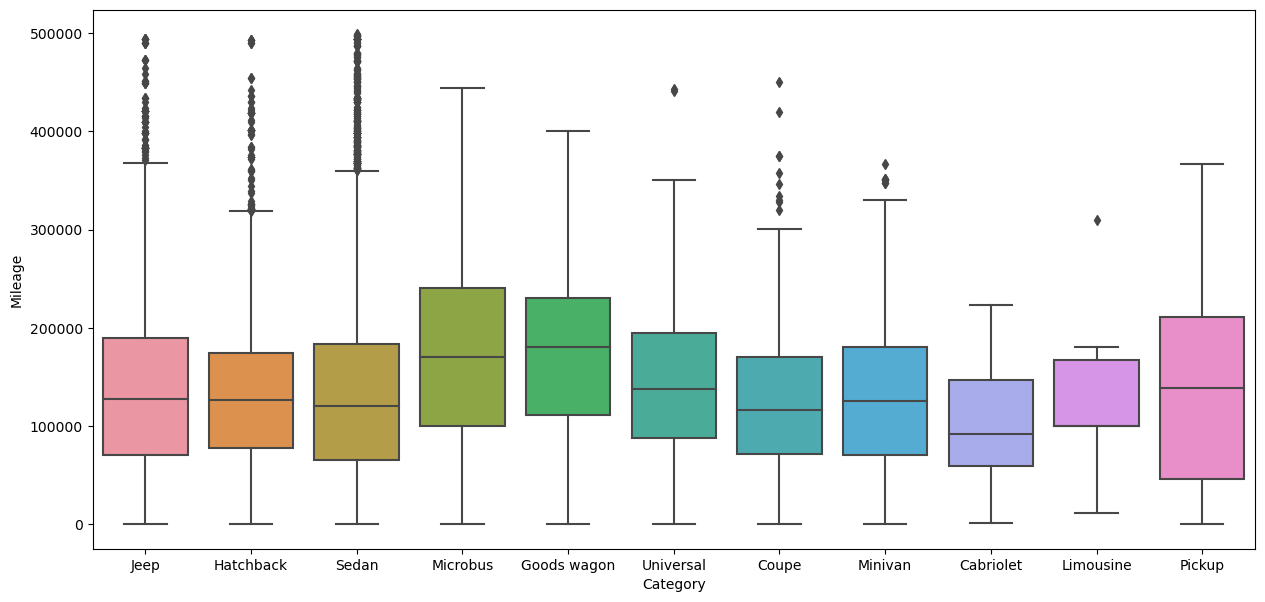

In [65]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=data[data['Mileage']<500000],x='Category', y='Mileage')

<AxesSubplot:>

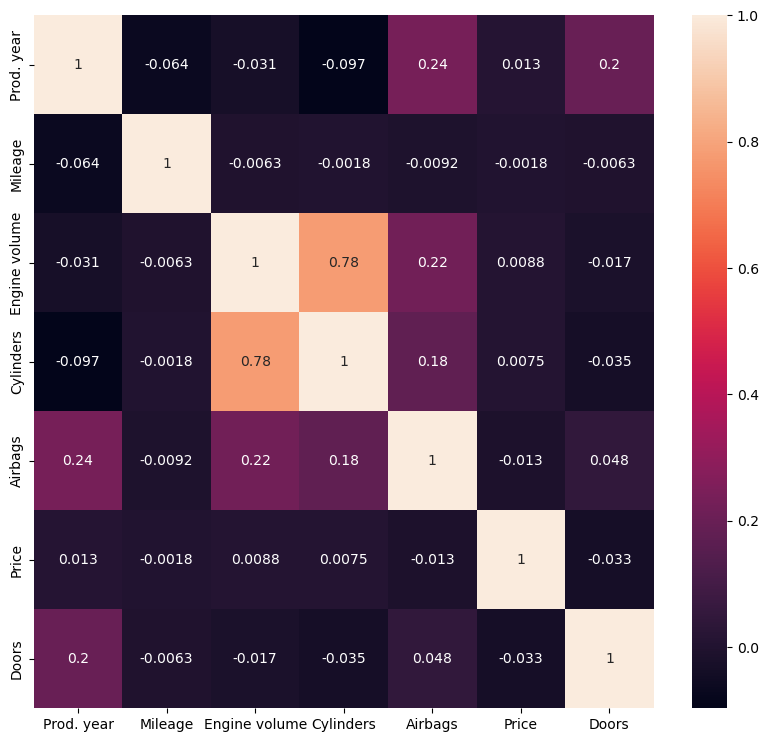

In [502]:
num_vars = ['Prod. year', 'Mileage', 'Engine volume', 'Cylinders', 'Airbags', 'Price', 'Doors']
fig,ax = plt.subplots(figsize=(10,9))
sns.heatmap(data[num_vars].corr(),annot=True)

In [864]:
data

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,45778856,15681,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,45804997,26108,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4
19235,45793526,5331,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4


<AxesSubplot:xlabel='Category', ylabel='Mileage'>

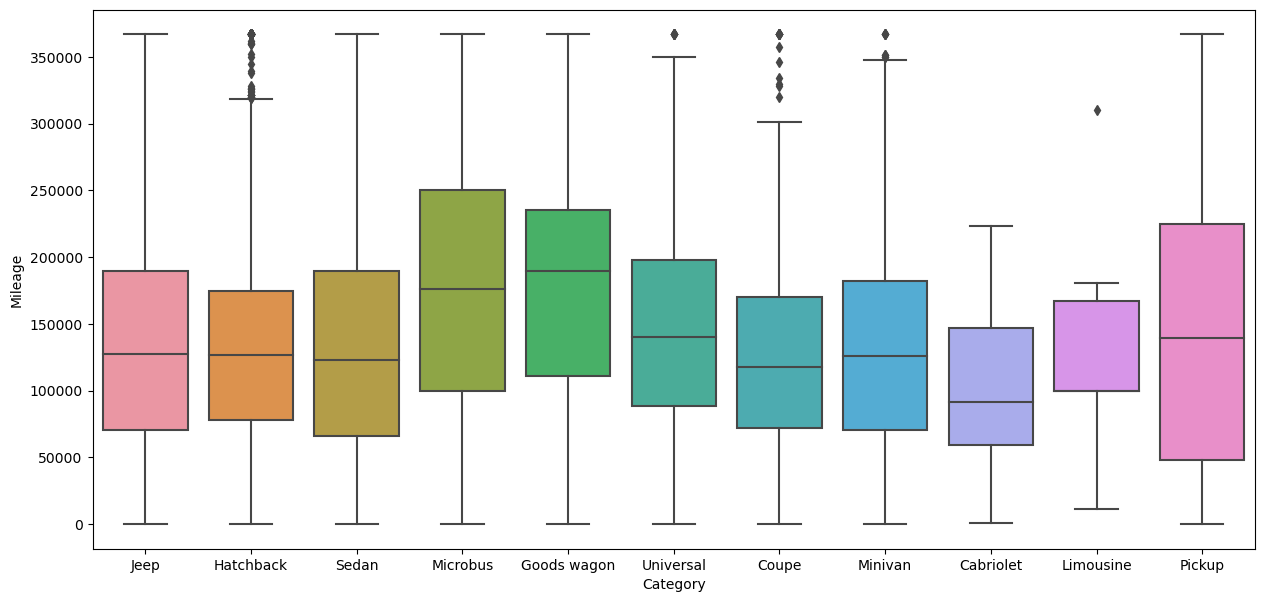

In [152]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data = data_clean,x='Category', y='Mileage')

<AxesSubplot:xlabel='Category', ylabel='Mileage'>

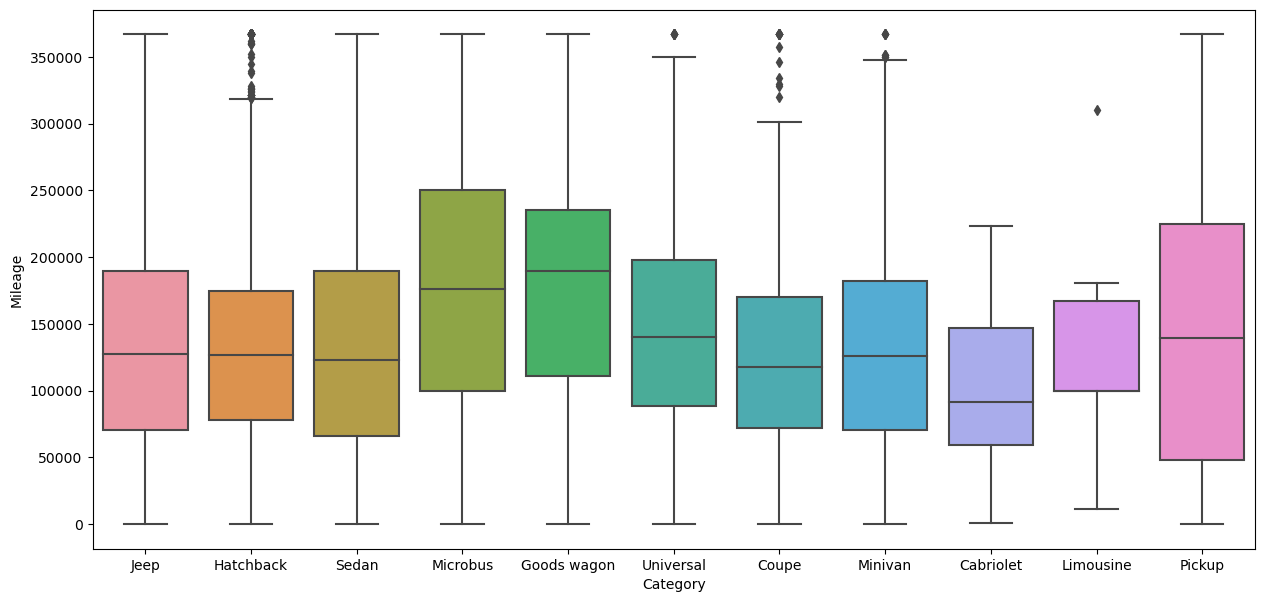

In [153]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data = data,x='Category', y='Mileage')

In [865]:
data.shape

(19237, 17)

# Data pre-processing, removing outliers

In [866]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)


def handling_outliers(df, columns):
    '''
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        for i in range(data.shape[0]):
            if data[col][i] < lower_bound:
                data[col][i] = lower_bound
            elif data[col][i] > upper_bound:
                data[col][i] = upper_bound
            else:
                continue
    return data
    '''
    def outliers_detection(df,f):
        Q1 = np.percentile(df[f],25)
        Q3 = np.percentile(df[f],75)
        IQR = Q3 - Q1

        lower_bound = Q1 - (1.8*IQR)
        upper_bound = Q3 + (1.8*IQR)

        ls = df.index[(df[f] < lower_bound ) | (df[f] > upper_bound) ]

        return ls

    def remove(df,ls):
        ls = sorted(set(ls))
        df = df.drop(ls)
        return df
    index_list = []
    ## using for loop to extract all the outliers
    for feature in columns:
        index_list.extend(outliers_detection(df,feature))
    df_cleaned = remove(df,index_list)
    return df_cleaned

cont_d = ['Price','Mileage','Engine volume']
data_clean = handling_outliers(data, cont_d)

In [867]:
data_clean.shape

(17017, 17)

In [868]:
max(data_clean['Price'])

52106

In [980]:
data_clean

,ID,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,45778856,15681,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,45804997,26108,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4
19235,45793526,5331,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4.0,Automatic,Front,4,Left wheel,Black,4


# One-Hot-Encoding

In [870]:
def one_hot_encoding(cols,df):
    for col in cols:
        print(col)
        temp = pd.get_dummies(df[col], drop_first = False)
        df = pd.concat([df, temp], axis = 1)
        df.drop([col], axis = 1, inplace = True)
    return df

In [871]:
cols = ['Manufacturer','Model','Category','Leather interior','Fuel type','Gear box type','Drive wheels','Wheel','Color']
#cols = ['Gear box type','Leather interior']
data_ohe = one_hot_encoding(cols,data_clean)

Manufacturer
Model
Category
Leather interior
Fuel type
Gear box type
Drive wheels
Wheel
Color


In [1020]:
data_ohe

,Price,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,ACURA,ALFA ROMEO,AUDI,...,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow
0,13328,2010,3.5,186005,6.0,4,12,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,16621,2011,3.0,192000,6.0,4,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8467,2006,1.3,200000,4.0,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,2011,2.5,168966,4.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11726,2014,1.3,91901,4.0,4,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,1999,2.0,300000,4.0,2,5,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19233,15681,2011,2.4,161600,4.0,4,8,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,26108,2010,2.0,116365,4.0,4,4,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19235,5331,2007,2.0,51258,4.0,4,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [938]:
def get_length(col):
    return len(np.unique(data_clean[col]))

In [958]:
cat_len = [7]
for col in cols:
    print(get_length(col))
    cat_len.append(get_length(col))

60
1381
11
2
7
4
3
2
16


# Split the data into train and test sets

In [875]:
df_train, df_test = train_test_split(data_ohe, train_size = 0.9, test_size = 0.1)

In [604]:
num_vars

['Prod. year',
 'Mileage',
 'Engine volume',
 'Cylinders',
 'Airbags',
 'Price',
 'Doors']

In [350]:
price_min = np.min(df_train['Price'])
price_max = np.max(df_train['Price'])

In [876]:
df_train

,Price,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,ACURA,ALFA ROMEO,AUDI,...,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow
3573,19130,2014,1.6,142495,4.0,4,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16688,392,2015,1.8,115347,4.0,4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19001,7500,2000,1.7,187000,4.0,4,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8311,14426,2014,1.8,68000,4.0,4,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3629,8467,2014,3.0,98803,6.0,4,12,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9320,16308,2008,2.4,236190,4.0,4,10,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9692,220,2018,2.5,70662,4.0,4,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8421,157,2011,3.5,220323,6.0,4,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,43952,2017,2.5,111643,4.0,4,4,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [877]:
from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1085]:
X_train = df_train.drop('Price',axis=1)
y_train = df_train['Price']

X_test = df_test.drop('Price',axis=1)
y_test = df_test['Price']

#data_ohe.drop('Price',axis=1)
#data_ohe['Price']

In [1086]:
X_train

,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,ACURA,ALFA ROMEO,AUDI,BMW,...,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow
3573,0.571860,-0.896013,0.115530,-0.429894,0.186223,-0.611992,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16688,0.751027,-0.574926,-0.207280,-0.429894,0.186223,-1.550619,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19001,-1.936476,-0.735470,0.644730,-0.429894,0.186223,-0.611992,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8311,0.571860,-0.574926,-0.770273,-0.429894,0.186223,-0.142679,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3629,0.571860,1.351593,-0.404002,1.786510,0.186223,1.265262,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9320,-0.503141,0.388333,1.229637,-0.429894,0.186223,0.795948,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9692,1.288527,0.548877,-0.738620,-0.429894,0.186223,1.265262,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8421,0.034359,2.154310,1.040966,1.786510,0.186223,1.265262,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,1.109360,0.548877,-0.251324,-0.429894,0.186223,-0.611992,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Use random forest regressor to predict the price

In [994]:
no_bootstrap_model = RandomForestRegressor(n_estimators = 100, criterion = 'mse', bootstrap = False)
no_bootstrap_model.fit(X_train, y_train)

C:\Users\darkn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(bootstrap=False, criterion='mse')

In [995]:
no_bootstrap_model.score(X_train,y_train)

0.9962649750609771

In [990]:
bootstrap_model = RandomForestRegressor(n_estimators = 100, criterion = 'mse', bootstrap = True)
bootstrap_model.fit(X_train, y_train)

C:\Users\darkn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse')

In [991]:
bootstrap_model.score(X_train,y_train)

0.9652755886038238

In [996]:
no_bootstrap_model.score(X_test, y_test)

0.6887346084313852

In [993]:
bootstrap_model.score(X_test, y_test)

0.7867528835758733

## Thus, the boostrap model performs better on the test set

In [1015]:
y_pred = no_bootstrap_model.predict(X_test)

mse = mean_squared_error(y_pred, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 


MSE:  0.30796203571701997
RMSE:  0.15398101785850998


In [998]:
y_pred2 = nbootstrap_model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  0.21098399585577376
RMSE:  0.10549199792788688


Text(0, 0.5, '$y_{pred}$')

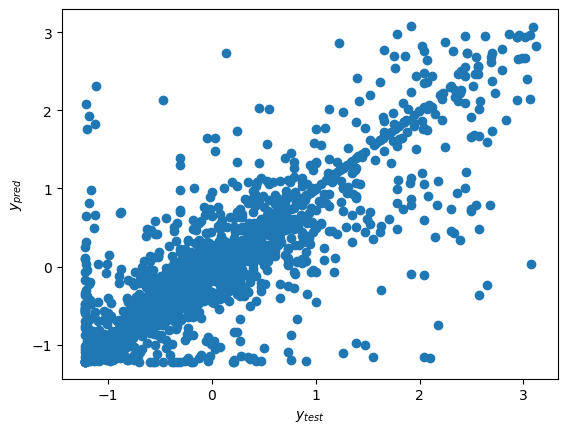

In [1002]:
plt.scatter(y_test,y_pred)
plt.xlabel(r'$y_{test}$')
plt.ylabel(r'$y_{pred}$')

Text(0, 0.5, '$y_{pred}$')

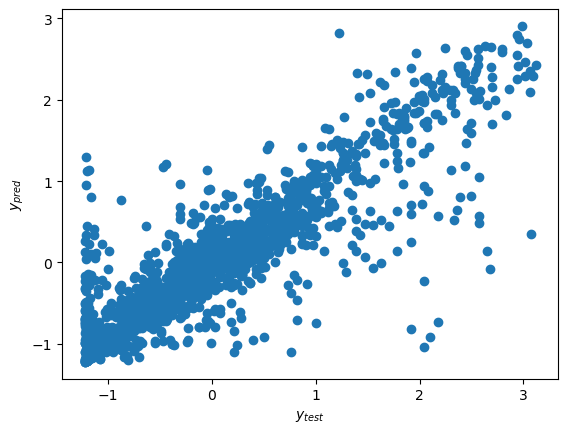

In [1003]:
plt.scatter(y_test,y_pred2)
plt.xlabel(r'$y_{test}$')
plt.ylabel(r'$y_{pred}$')

# Try different models

In [1080]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

In [1093]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
cb  = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr)]

Linear Regression : -11068242356447195136 %
K Nearest Neighbours : 65 %
Decision Tree : 51 %
Random Forest : 74 %
AdaBoost : 39 %
Gradient Boosting Regressor : 76 %


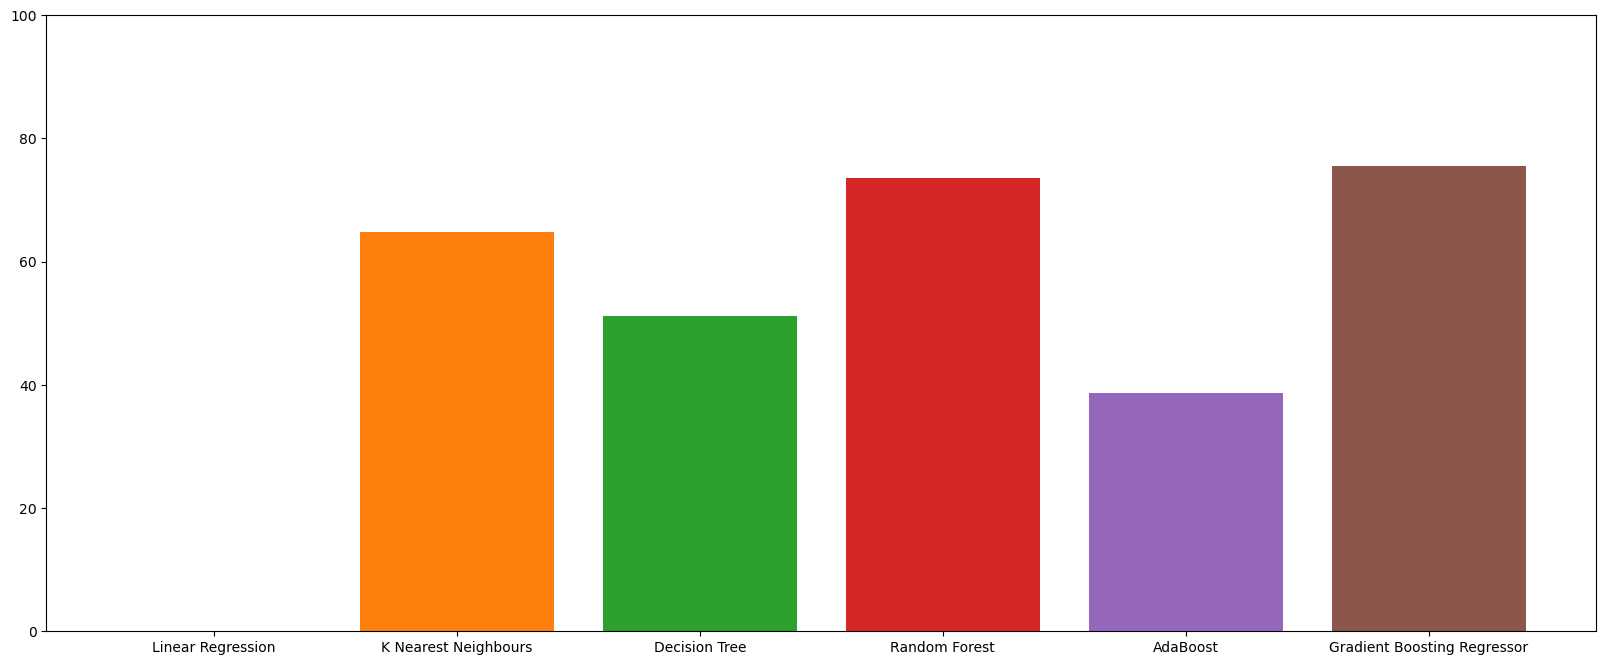

In [1106]:
for regressor_name, regressor in regressors:

    regressor.fit(X_train, y_train)    
  
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)
    plt.ylim([0,100])

## The performance of random forest is pretty good. 

In [1097]:
y_pred = lr.predict(X_test)
accuracy = round(r2_score(y_test,y_pred),3)*100
accuracy

-1.1068242356447195e+19

In [1104]:
lr.score(X_train,y_train)

0.5303833306457988

# Cross validation

In [669]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(bootstrap_model, data_ohe.drop('Price',axis=1),data_ohe['Price'], cv = cv)

C:\Users\darkn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\darkn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\darkn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\darkn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\darkn\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: C

array([0.77883046, 0.76806483, 0.7673978 , 0.7562127 , 0.7617299 ])

In [535]:
data.iloc[1]

ID                    44731507
Price                    16621
Manufacturer         CHEVROLET
Model                  Equinox
Prod. year                2011
Category                  Jeep
Leather interior            No
Fuel type               Petrol
Engine volume              3.0
Mileage                 192000
Cylinders                  6.0
Gear box type        Tiptronic
Drive wheels               4x4
Doors                        4
Wheel               Left wheel
Color                    Black
Airbags                      8
Name: 1, dtype: object

In [745]:
price_mean = data_ohe['Price'].describe().mean()
price_std = data_ohe['Price'].describe().mean()

In [808]:
num_vars

['Prod. year',
 'Mileage',
 'Engine volume',
 'Cylinders',
 'Airbags',
 'Price',
 'Doors']

In [1021]:
def predict_price(manufacturer, model, prod_year, category, leather_int, fuel, engine_vol, mileage, cylinders, gear_box, drive_wheels, doors, wheel, color, airbags):
    
    input_df = pd.DataFrame(df_test.iloc[0:1])
    input_df.iloc[:] = 0
    
    manu_index = np.where(input_df.columns == manufacturer)[0][0]
    model_index = np.where(input_df.columns == model)[0][0]
    cate_index = np.where(input_df.columns == category)[0][0]
    leather_index = np.where(input_df.columns == leather_int)[0][0]
    fuel_index = np.where(input_df.columns == fuel)[0][0]
    gearbox_index = np.where(input_df.columns == gear_box)[0][0]
    drive_wheels_index = np.where(input_df.columns == drive_wheels)[0][0]
    wheel_index = np.where(input_df.columns == wheel)[0][0]
    color_index = np.where(input_df.columns == color)[0][0]
    
    idx_list = [manu_index,model_index,cate_index,leather_index,fuel_index,gearbox_index,drive_wheels_index,wheel_index,color_index]

    input_df[num_vars] = [prod_year,mileage,engine_vol,cylinders,airbags,0, doors]
    input_df[manufacturer] = 1
    input_df[model] = 1
    input_df[category] = 1
    input_df[leather_int] = 1
    input_df[fuel] = 1
    input_df[gear_box] = 1
    input_df[drive_wheels] = 1
    input_df[wheel] = 1
    input_df[color] = 1

    
    input_df[num_vars] = scaler.transform(input_df[num_vars])
    y_pred = bootstrap_model.predict(input_df.drop('Price', axis = 1))
    
    input_df['Price'] = y_pred
    input_df[num_vars] = scaler.inverse_transform(input_df[num_vars])

    return y_pred #int(input_df['Price'])

In [1025]:
X_test.iloc[0]

Prod. year      -0.144807
Engine volume    0.548877
Mileage          2.234575
Cylinders       -0.429894
Doors            0.186223
                   ...   
Red              0.000000
Silver           1.000000
Sky blue         0.000000
White            0.000000
Yellow           0.000000
Name: 7555, Length: 1492, dtype: float64

In [1028]:
bootstrap_model.predict(df_test.drop('Price',axis = 1))

array([-1.15248849,  0.15161283, -0.60131766, ..., -0.46127166,
        0.19803616, -1.16023086])

In [1029]:
df_test.head()

,Price,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,ACURA,ALFA ROMEO,AUDI,...,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow
7555,-0.819063,-0.144807,0.548877,2.234575,-0.429894,0.186223,1.265262,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8084,0.542673,-0.144807,-0.253840,-0.822272,-0.429894,0.186223,-0.611992,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13520,-0.596612,-2.115642,1.030507,-1.281577,1.786510,0.186223,-0.142679,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13677,2.457864,0.751027,0.388333,-0.240801,-0.429894,0.186223,-0.611992,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8553,2.386440,0.930193,0.548877,-0.651365,-0.429894,0.186223,-1.550619,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1117]:
manufacturer = 'LEXUS'
model = 'RX 450'
prod_year = 2010
category  = 'Jeep'
leather_int = 'Yes'
fuel = 'Hybrid'
engine_vol = 3.5
mileage = 100
cylinders = 6.0
gear_box = 'Automatic'
drive_wheels = '4x4'
doors = 4
wheel = 'Left wheel'
color = 'Silver'
airbags = 2

price_pred  = predict_price(manufacturer,model, prod_year,  category,  leather_int,  fuel,engine_vol,  mileage,   cylinders,   gear_box,   drive_wheels, doors,  wheel,  color, airbags)

print(price_pred)

[1.11736842]


In [1065]:
price_pred

array([1.56245602])

In [1107]:
input_df[num_vars] = scaler.transform(input_df[num_vars])
y_pred = bootstrap_model.predict(input_df.drop('Price', axis = 1))
print(y_pred)
input_df['Price'] = y_pred
input_df

[-0.24739258]


,Price,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,ACURA,ALFA ROMEO,AUDI,...,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow
7555,-0.247393,-360.296024,-0.006106,-1.578865,-2.882888,-9.166246,-1.253717,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [1067]:
manufacturer = 'LEXUS'
model = 'RX 450'
prod_year = 2010
category  = 'Jeep'
leather_int = 'Yes'
fuel = 'Hybrid'
engine_vol = 3.5
mileage = 100
cylinders = 6.0
gear_box = 'Automatic'
drive_wheels = '4x4'
doors = 4
wheel = 'Left wheel'
color = 'Silver'
airbags = 12

input_df = pd.DataFrame(df_test.iloc[0:1])
input_df.iloc[:] = 0

manu_index = np.where(input_df.columns == manufacturer)[0][0]
model_index = np.where(input_df.columns == model)[0][0]
cate_index = np.where(input_df.columns == category)[0][0]
leather_index = np.where(input_df.columns == leather_int)[0][0]
fuel_index = np.where(input_df.columns == fuel)[0][0]
gearbox_index = np.where(input_df.columns == gear_box)[0][0]
drive_wheels_index = np.where(input_df.columns == drive_wheels)[0][0]
wheel_index = np.where(input_df.columns == wheel)[0][0]
color_index = np.where(input_df.columns == color)[0][0]

idx_list = [manu_index,model_index,cate_index,leather_index,fuel_index,gearbox_index,drive_wheels_index,wheel_index,color_index]

input_df[num_vars] = [prod_year,mileage,engine_vol,cylinders,airbags,0, doors]
input_df[manufacturer] = 1
input_df[model] = 1
input_df[category] = 1
input_df[leather_int] = 1
input_df[fuel] = 1
input_df[gear_box] = 1
input_df[drive_wheels] = 1
input_df[wheel] = 1
input_df[color] = 1

In [1068]:
input_df[num_vars] = scaler.transform(input_df[num_vars])

y_pred = bootstrap_model.predict(input_df.drop('Price', axis = 1))
print(y_pred)
input_df['Price'] = y_pred
input_df[num_vars] = scaler.inverse_transform(input_df[num_vars])

[0.05155214]


In [1069]:
input_df['Price']

7555    15295.062123
Name: Price, dtype: float64

In [897]:
input_df

,Price,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags,ACURA,ALFA ROMEO,AUDI,...,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow
7555,12813.716492,2010.0,3.5,18600.0,6.0,4.0,12.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Export the model using Pickle

In [921]:
import pickle
with open('car.pickle','wb') as f:
    pickle.dump(bootstrap_model, f)

In [962]:
import json
columns = {'data_cols': [col for col in data_ohe.columns]}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [924]:
scaler.inverse_transform

<bound method StandardScaler.inverse_transform of StandardScaler()>

In [925]:
with open('inv_transform.pickle','wb') as f:
    pickle.dump(scaler.inverse_transform, f)

In [926]:
with open('transform.pickle','wb') as f:
    pickle.dump(scaler.transform, f)